<a href="https://colab.research.google.com/github/shruti2340/SCT_DS__2/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub pandas seaborn matplotlib --quiet


In [ ]:
import kagglehub

path = kagglehub.dataset_download("ashishkumarjayswal/titanic-datasets")

print("Path to dataset files:", path)
#download and upload the data on google colab from the link below

Path to dataset files: /kaggle/input/titanic-datasets


In [ ]:
from google.colab import files
uploaded = files.upload()
#choose the file you downloaded from the previous code


Saving archive.zip to archive (1).zip


In [ ]:
#the dataset is downloaded and saved as archive.zip
import zipfile
import os
with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("titanic_data")

os.listdir("titanic_data")


['titanic.csv']

In [ ]:
import pandas as pd
df = pd.read_csv(f"{path}/titanic.csv")  # Adjust name if different
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df = df.dropna(subset=['Survived', 'Pclass', 'Sex', 'Age'])  # Drop rows with essential missing data
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Convert gender to numeric


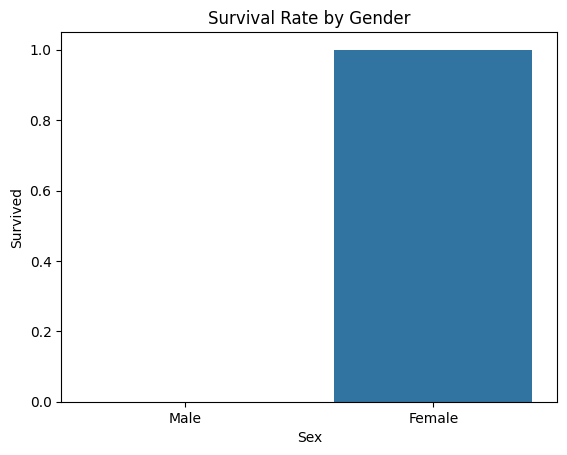

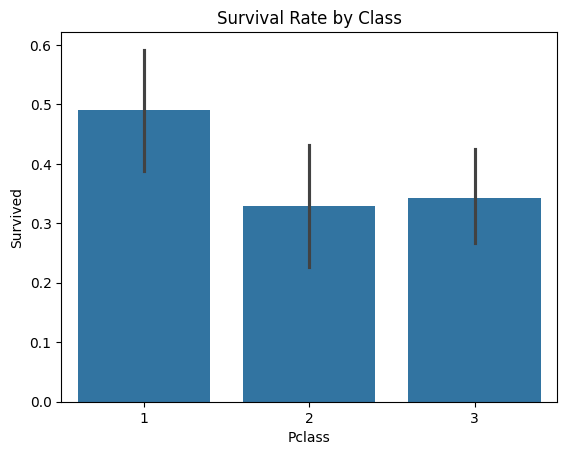

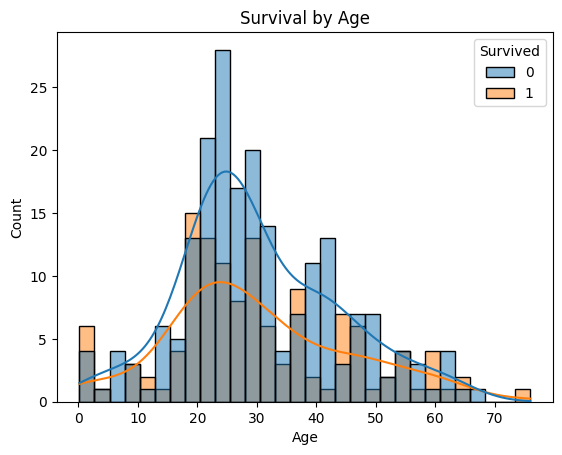

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Sex', y='Survived', data=df)
plt.xticks([0, 1], ['Male', 'Female'])
plt.title("Survival Rate by Gender")
plt.show()

sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Class")
plt.show()

sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Survival by Age")
plt.show()


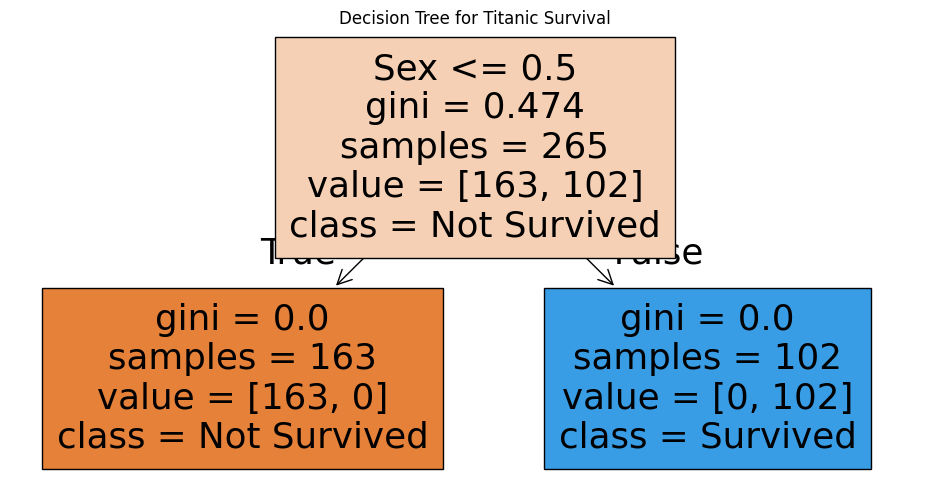

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

features = ['Pclass', 'Sex', 'Age']
X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Decision Tree for Titanic Survival")
plt.show()


#Conclusion derived
🔹 1. Gender Was the Most Influential Factor
Females had a much higher survival rate than males.

Conclusion: "Women and children first" policy significantly affected outcomes.

🔹 2. Passenger Class Mattered Greatly
1st Class passengers had the highest survival rates.

3rd Class passengers had the lowest.

Conclusion: Wealth and social status provided better access to lifeboats.

🔹 3. Age Influenced Survival
Young children, especially under 10 years old, had better chances.

Older adults had lower survival rates.

Conclusion: Younger passengers were prioritized during evacuation.